Q ) Problem Statement

This project is about building model with different algorithms and explaining which model is performing well based on many strategies that we have discussed in class.

Submit along with your findings and observations after several hyper parameter tuning in a sheet this is mandatory!!!


In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import pickle
%matplotlib inline
os.chdir(r'C:\Users\Shyam Adsul\Python codes SSPU\Data sets')


In [15]:

df = pd.read_csv('House Price_04022021.csv')


In [16]:
df['Alley'] = df['Alley'].replace(np.nan,df['Alley'].mode().iloc[0])
df

,Id,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,Grvl,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,Grvl,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,Grvl,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,Grvl,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,Grvl,350.0,1145,1053,2198,Attchd,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,Grvl,0.0,953,694,1647,Attchd,460,175000
1456,1457,85.0,13175,Grvl,119.0,2073,0,2073,Attchd,500,210000
1457,1458,66.0,9042,Grvl,0.0,1188,1152,2340,Attchd,252,266500
1458,1459,68.0,9717,Grvl,0.0,1078,0,1078,Attchd,240,142125


In [17]:
df1 = df.drop('Id', axis = 1)
df1

,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,65.0,8450,Grvl,196.0,856,854,1710,Attchd,548,208500
1,80.0,9600,Grvl,0.0,1262,0,1262,Attchd,460,181500
2,68.0,11250,Grvl,162.0,920,866,1786,Attchd,608,223500
3,60.0,9550,Grvl,0.0,961,756,1717,Detchd,642,140000
4,84.0,14260,Grvl,350.0,1145,1053,2198,Attchd,836,250000
...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,Grvl,0.0,953,694,1647,Attchd,460,175000
1456,85.0,13175,Grvl,119.0,2073,0,2073,Attchd,500,210000
1457,66.0,9042,Grvl,0.0,1188,1152,2340,Attchd,252,266500
1458,68.0,9717,Grvl,0.0,1078,0,1078,Attchd,240,142125


In [18]:

df1['Alley'].unique()


array(['Grvl', 'Pave'], dtype=object)

In [19]:
df1['GarageType'] = df1['GarageType'].replace(np.nan,df1['GarageType'].mode().iloc[0])

df1['Alley'] = df1['Alley'].replace({'Grvl':1,"Pave":2})

#['Grvl' === 1, 'Pave'===2]


In [20]:

df1['GarageType'].unique()


array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [21]:
df1['GarageType'] = df1['GarageType'].replace({'Attchd':1,"Detchd":2,'BuiltIn':3,'CarPort':4,'Basment':5,'2Types':6})


In [22]:
df1['MasVnrArea'] = df1['MasVnrArea'].replace(0,np.nan)
df1['2ndFlrSF'] = df1['2ndFlrSF'].replace(0,np.nan)



In [23]:


df1.isnull().sum()


LotFrontage    259
LotArea          0
Alley            0
MasVnrArea     869
1stFlrSF         0
2ndFlrSF       829
GrLivArea        0
GarageType       0
GarageArea       0
SalePrice        0
dtype: int64

In [24]:
df1['LotFrontage'] = df1['LotFrontage'].replace(np.nan,df1['LotFrontage'].mean())
df1['MasVnrArea'] = df1['MasVnrArea'].replace(np.nan,df1['MasVnrArea'].mean())
df1['2ndFlrSF'] = df1['2ndFlrSF'].replace(np.nan,df1['2ndFlrSF'].mean())


In [25]:
df1.isnull().sum()

LotFrontage    0
LotArea        0
Alley          0
MasVnrArea     0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageType     0
GarageArea     0
SalePrice      0
dtype: int64

<AxesSubplot:>

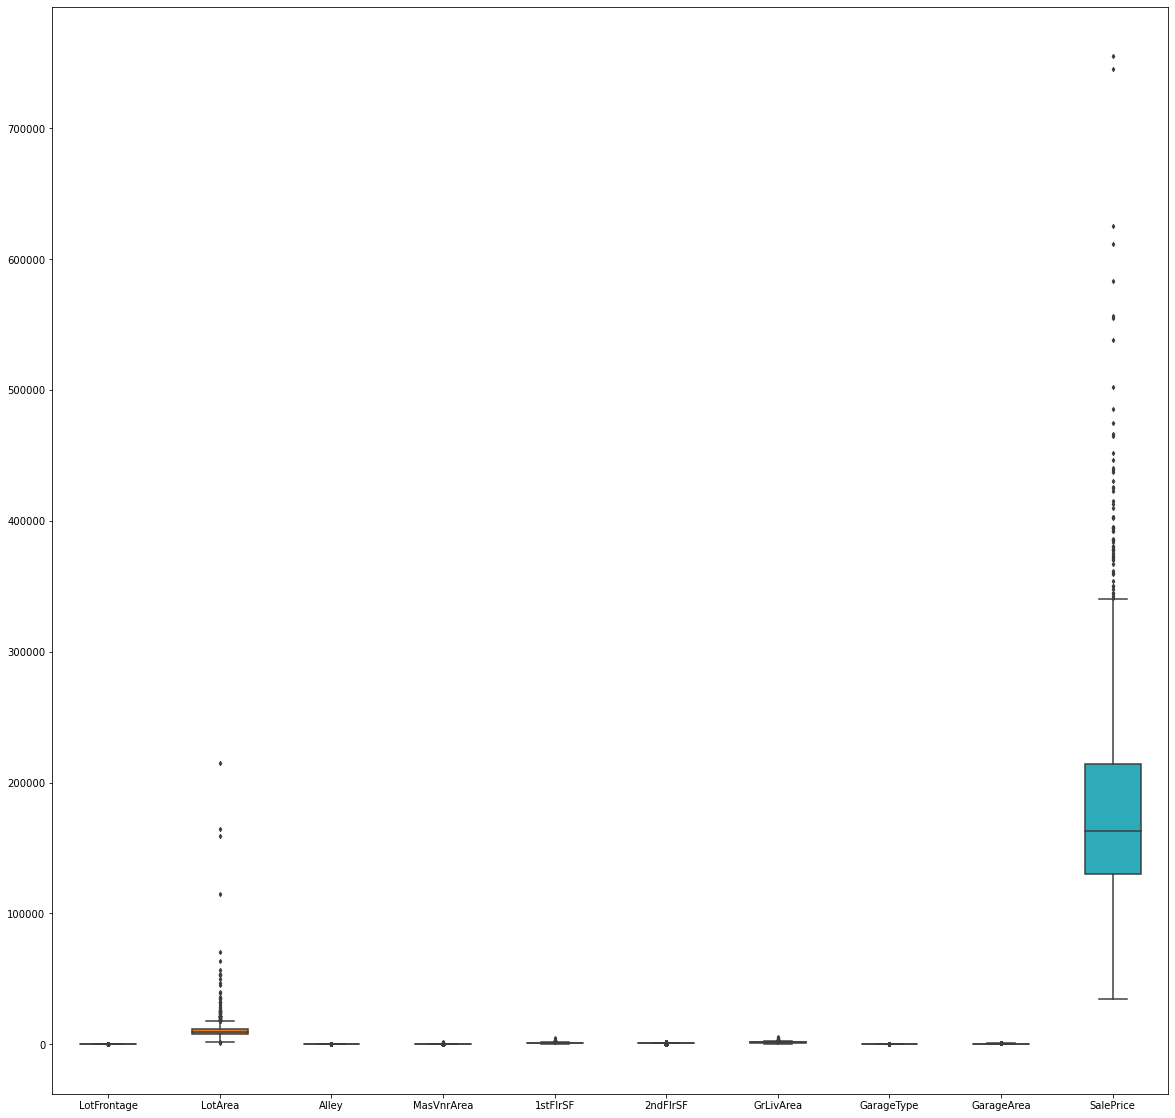

In [33]:

fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=df1, width= 0.5,ax=ax,  fliersize=3)


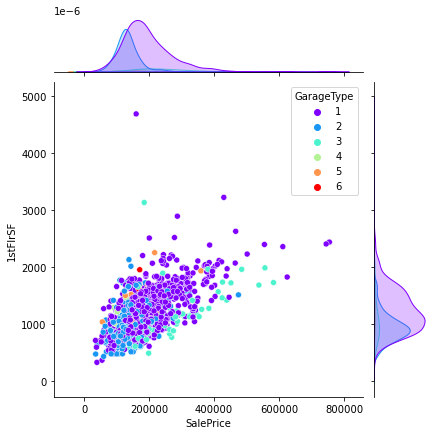

In [34]:
sns.jointplot(x=df1['SalePrice'],y=df1['1stFlrSF'],hue='GarageType',palette= 'rainbow',data=df1)

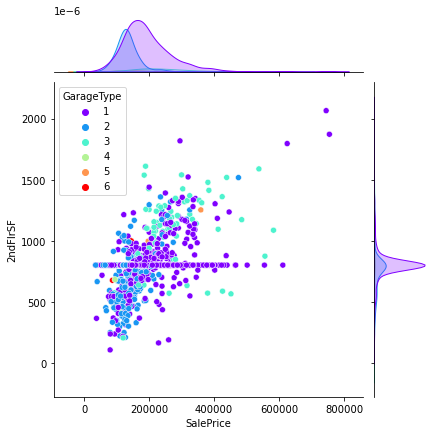

In [35]:
sns.jointplot(x=df1['SalePrice'],y=df1['2ndFlrSF'],hue='GarageType',palette='rainbow',data=df1)

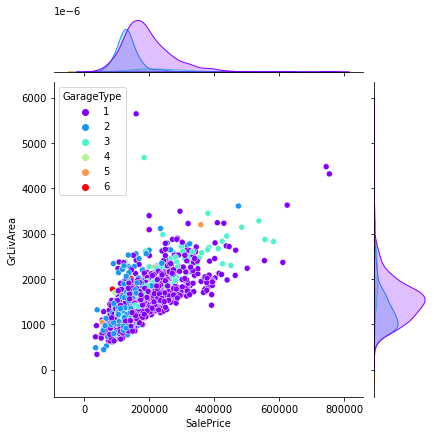

In [36]:
sns.jointplot(x=df1['SalePrice'],y=df1['GrLivArea'],hue='GarageType',palette='rainbow',data=df1)

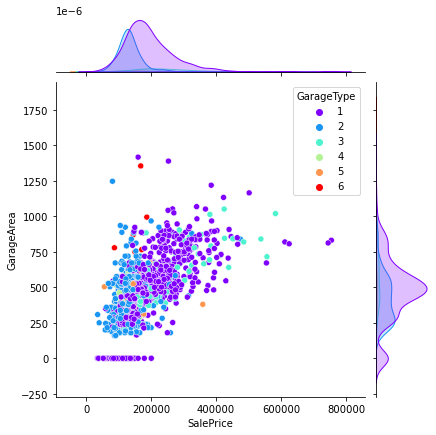

In [37]:
sns.jointplot(x=df1['SalePrice'],y=df1['GarageArea'],hue='GarageType',palette='rainbow',data=df1)

# Saleprice outlier treatment


3937.5
340037.5


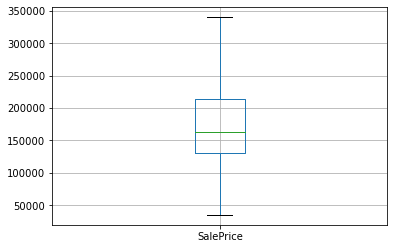

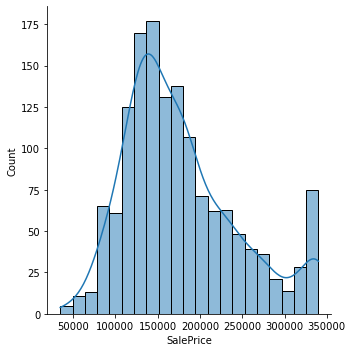

In [41]:
IQR=df1.SalePrice.quantile(0.75)-df1.SalePrice.quantile(0.25)
lower_limit=df1['SalePrice'].quantile(0.25)-(IQR*1.5)
upper_limit=df1['SalePrice'].quantile(0.75)+(IQR*1.5)
print(lower_limit), print(upper_limit)


data1 = df1.copy()

data1.loc[data1['SalePrice']>=340037.5,'SalePrice']=340037.5

data1.loc[data1['SalePrice']<=3937.5,'SalePrice']=3937.5


figure=data1.boxplot(column="SalePrice")
sns.displot(data=data1,x = 'SalePrice',kde = True)



3937.5 	 340037.5


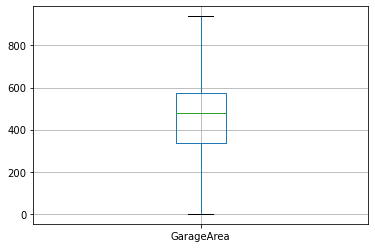

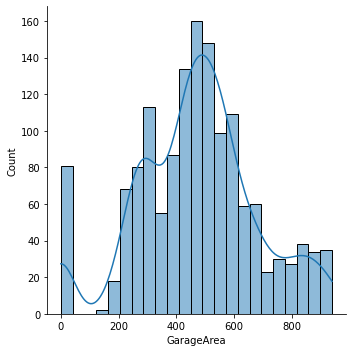

In [42]:
#        # Outlier treating GarageArea

IQR1=df1.GarageArea.quantile(0.75)-df1.GarageArea.quantile(0.25)

lower_limit1=df1['GarageArea'].quantile(0.25)-(IQR1*1.5)
upper_limit1=df1['GarageArea'].quantile(0.75)+(IQR1*1.5)
print(lower_limit, "\t",upper_limit)

data2 = data1.copy()

data2.loc[data2['GarageArea']>=938.25,'GarageArea']=938.25

data2.loc[data2['GarageArea']<=-27.75 ,'GarageArea']=-27.75 
figure=data2.boxplot(column="GarageArea")
sns.displot(data=data2,x = 'GarageArea',kde = True)

158.625 	 2747.625


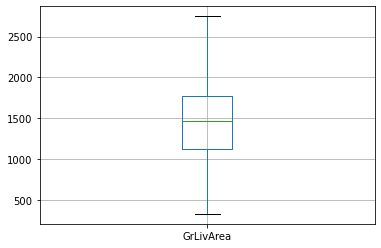

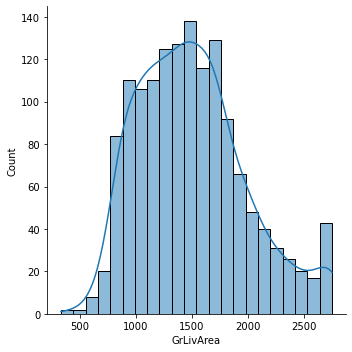

In [43]:
# GrLivArea	 outlier treating
IQR2=df1.GrLivArea.quantile(0.75)-df1.GrLivArea.quantile(0.25)
lower_limit2=df1['GrLivArea'].quantile(0.25)-(IQR2*1.5)
upper_limit2=df1['GrLivArea'].quantile(0.75)+(IQR2*1.5)
print(lower_limit2, "\t",upper_limit2)
data3 = data2.copy()
data3.loc[data3['GrLivArea']>=2747.625,'GrLivArea']=2747.625
data3.loc[data3['GrLivArea']<=158.625 ,'GrLivArea']=158.625 
figure=data3.boxplot(column="GrLivArea")
sns.displot(data=data3,x = 'GrLivArea',kde = True)

158.625 	 2747.625


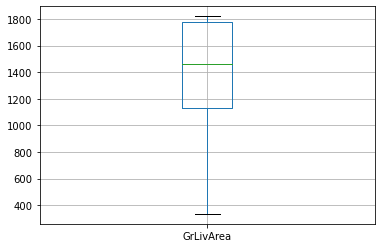

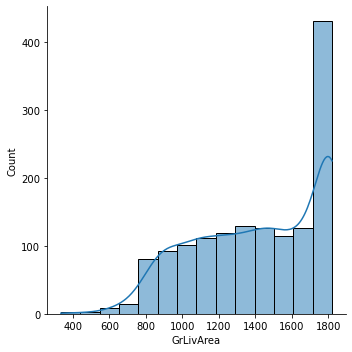

In [44]:
# 2ndFlrSF outlier treating
IQR3=df1['2ndFlrSF'].quantile(0.75)-df1['2ndFlrSF'].quantile(0.25)

lower_limit3=df1['2ndFlrSF'].quantile(0.25)-(IQR3*1.5)
upper_limit3=df1['2ndFlrSF'].quantile(0.75)+(IQR3*1.5)
print(lower_limit2, "\t",upper_limit2)
data4 = data3.copy()
data4.loc[data4['GrLivArea']>=1820,'GrLivArea']=1820
data4.loc[data4['GrLivArea']<=-1092.0  ,'GrLivArea']=-1092.0 
figure=data4.boxplot(column="GrLivArea")
sns.displot(data=data4,x = 'GrLivArea',kde = True)

118.125 	 2155.125


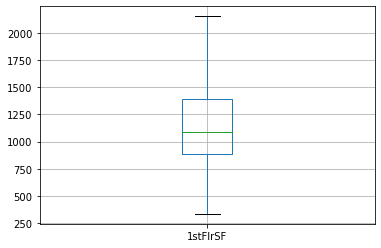

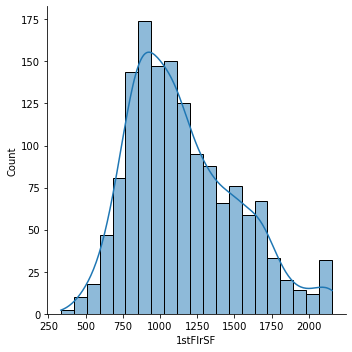

In [45]:
# 1stFlrSF outlier treating
IQR4=df1['1stFlrSF'].quantile(0.75)-df1['1stFlrSF'].quantile(0.25)

lower_limit4=df1['1stFlrSF'].quantile(0.25)-(IQR4*1.5)
upper_limit4=df1['1stFlrSF'].quantile(0.75)+(IQR4*1.5)
print(lower_limit4, "\t",upper_limit4)
data5 = data4.copy()
data5.loc[data5['1stFlrSF']>=2155.125,'1stFlrSF']=2155.125
data5.loc[data5['1stFlrSF']<=118.125  ,'1stFlrSF']=118.125 
figure=data5.boxplot(column="1stFlrSF")
sns.displot(data=data5,x = '1stFlrSF',kde = True)

254.7394247038917 	 254.7394247038917


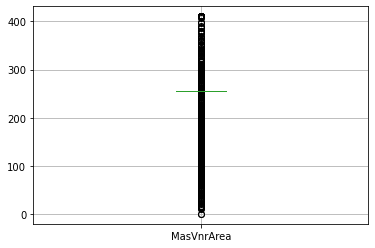

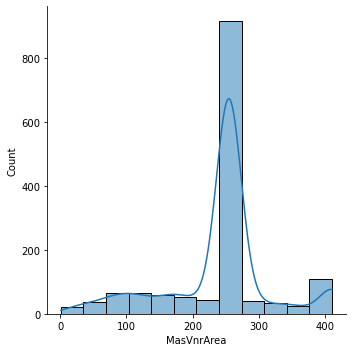

In [46]:
#    # MasVnrArea treating outlier
IQR5=df1['MasVnrArea'].quantile(0.75)-df1['MasVnrArea'].quantile(0.25)

lower_limit5=df1['MasVnrArea'].quantile(0.25)-(IQR5*1.5)
upper_limit5=df1['MasVnrArea'].quantile(0.75)+(IQR5*1.5)
print(lower_limit5, "\t",upper_limit5)
data6 = data5.copy()
data6.loc[data6['MasVnrArea']>=410.625,'MasVnrArea']=410.625
data6.loc[data6['MasVnrArea']<=-246.375 ,'MasVnrArea']=-246.375 
figure=data6.boxplot(column="MasVnrArea")
sns.displot(data=data6,x = 'MasVnrArea',kde = True)

1481.5 	 17673.5


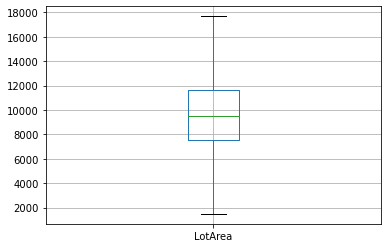

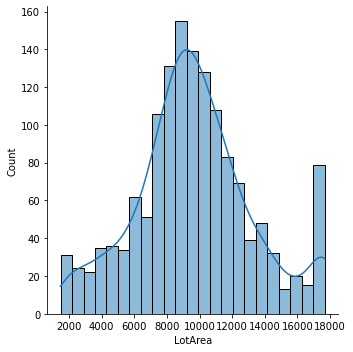

In [47]:
#     LotArea treating outliers
IQR6=df1.LotArea.quantile(0.75)-df1.LotArea.quantile(0.25)

lower_limit6=df1['LotArea'].quantile(0.25)-(IQR6*1.5)
upper_limit6=df1['LotArea'].quantile(0.75)+(IQR6*1.5)
print(lower_limit6, "\t",upper_limit6)
data7 = data6.copy()
data7.loc[data7['LotArea']>=17673.5,'LotArea']=17673.5
data7.loc[data7['LotArea']<=1481.5 ,'LotArea']=1481.5 
figure=data7.boxplot(column="LotArea")
sns.displot(data=data7,x = 'LotArea',kde = True)

31.5 	 107.5


,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,65.0,8450.0,1,196.000000,856.0,854.000000,1710.0,1,548.0,208500.0
1,80.0,9600.0,1,254.739425,1262.0,802.866878,1262.0,1,460.0,181500.0
2,68.0,11250.0,1,162.000000,920.0,866.000000,1786.0,1,608.0,223500.0
3,60.0,9550.0,1,254.739425,961.0,756.000000,1717.0,2,642.0,140000.0
4,84.0,14260.0,1,350.000000,1145.0,1053.000000,1820.0,1,836.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,1,254.739425,953.0,694.000000,1647.0,1,460.0,175000.0
1456,85.0,13175.0,1,119.000000,2073.0,802.866878,1820.0,1,500.0,210000.0
1457,66.0,9042.0,1,254.739425,1188.0,1152.000000,1820.0,1,252.0,266500.0
1458,68.0,9717.0,1,254.739425,1078.0,802.866878,1078.0,1,240.0,142125.0


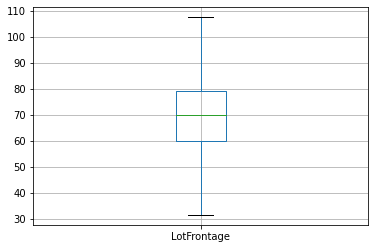

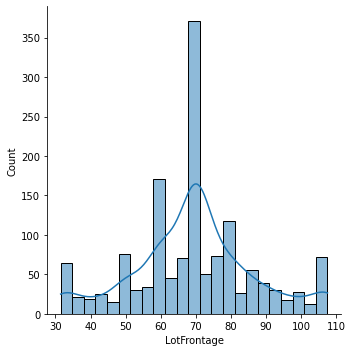

In [48]:
# LotFrontage outlier removing
IQR7=df1.LotFrontage.quantile(0.75)-df1.LotFrontage.quantile(0.25)

lower_limit7=df1['LotFrontage'].quantile(0.25)-(IQR7*1.5)
upper_limit7=df1['LotFrontage'].quantile(0.75)+(IQR7*1.5)
print(lower_limit7, "\t",upper_limit7)
data8 = data7.copy()
data8.loc[data8['LotFrontage']>=107.5,'LotFrontage']=107.5
data8.loc[data8['LotFrontage']<=31.5  ,'LotFrontage']=31.5  
figure=data8.boxplot(column="LotFrontage")
sns.displot(data=data8,x = 'LotFrontage',kde = True)
data8

In [52]:
#scaling
data8.columns

Index(['LotFrontage', 'LotArea', 'Alley', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageType', 'GarageArea', 'SalePrice'],
      dtype='object')

In [53]:
col= ['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageArea', 'SalePrice']

col1 = ['Alley','GarageType']
new_df = data8[col1]
new_df

,Alley,GarageType
0,1,1
1,1,1
2,1,1
3,1,2
4,1,1
...,...,...
1455,1,1
1456,1,1
1457,1,1
1458,1,1


In [54]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()
X_scaled = scaler.fit_transform(data8[col])

scaled_df = pd.DataFrame(X_scaled,columns=[col] )
scaled_df

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice
0,-0.248215,-0.333244,-0.559750,-0.830489,2.847700e-01,0.847845,0.373509,0.463935
1,0.622375,-0.013189,0.170438,0.289638,6.331434e-16,-0.454523,-0.051541,0.062047
2,-0.074097,0.446022,-0.982403,-0.653917,3.516002e-01,1.068783,0.663315,0.687207
3,-0.538412,-0.027104,0.170438,-0.540801,-2.610105e-01,0.868195,0.827539,-0.555671
4,0.854532,1.283733,1.354621,-0.033157,1.393038e+00,1.167623,1.764579,1.081653
...,...,...,...,...,...,...,...,...
1455,-0.422333,-0.481583,0.170438,-0.562873,-6.063001e-01,0.664700,-0.051541,-0.034704
1456,0.912571,0.981767,-1.516935,2.527134,6.331434e-16,1.167623,0.141664,0.486262
1457,-0.190176,-0.168485,0.170438,0.085477,1.944388e+00,1.167623,-1.056203,1.327251
1458,-0.074097,0.019374,0.170438,-0.218006,6.331434e-16,-0.989424,-1.114164,-0.524041


In [55]:
result = pd.concat([scaled_df,new_df], axis=1)
type(result)


pandas.core.frame.DataFrame

In [56]:
result.rename(columns={'(LotFrontage,)':'LotFrontage', '(LotArea,)':'LotArea','(MasVnrArea,)':'MasVnrArea', '(1stFlrSF,)':'1stFlrSF','(2ndFlrSF,)':'2ndFlrSF','(GrLivArea,)':'GrLivArea','(GarageArea,)':'GarageArea','(SalePrice,)':'SalePrice'}, inplace=True)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = scaled_df.columns

vif


,VIF,Features
0,1.607564,"(LotFrontage,)"
1,1.734099,"(LotArea,)"
2,1.035483,"(MasVnrArea,)"
3,1.834811,"(1stFlrSF,)"
4,1.290111,"(2ndFlrSF,)"
5,1.980339,"(GrLivArea,)"
6,1.833032,"(GarageArea,)"
7,3.230967,"(SalePrice,)"


In [59]:
result.columns
columns3 = [('LotFrontage',),     ('LotArea',),  ('MasVnrArea',),    ('1stFlrSF',),
          ('2ndFlrSF',),   ('GrLivArea',),  ('GarageArea',),  
                'Alley',     'GarageType']

In [60]:
y = scaled_df['SalePrice']
X =result[columns3]

C:\Users\Shyam Adsul\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=20)

In [62]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1022, 9), (438, 9), (1022, 1), (438, 1))

# Linear regression

In [63]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [64]:
print('intercept:', regression.intercept_)
print('slope:', regression.coef_)
print("\n\n")
y_pred = regression.predict(x_test)

intercept: [0.15125795]
slope: [[-0.00490326  0.03740119  0.04093916  0.19433604  0.17273898  0.37701619
   0.32638492  0.05696039 -0.14214633]]





In [65]:
regression.score(x_train,y_train)*100

70.04284879193993

In [66]:
regression.score(x_test, y_test)*100

70.86289299461674